In [1]:
import pandas as pd
import sqlite3 as sql # included as part of python standard library
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
# creating connection
conn  = sql.connect("Db-IMDB.db")

In [3]:
# Get list of all tables in the DB.
result = pd.read_sql_query("SELECT tbl_name FROM sqlite_master where type = 'table';", conn)
print(result)

      tbl_name
0        Movie
1        Genre
2     Language
3      Country
4     Location
5   M_Location
6    M_Country
7   M_Language
8      M_Genre
9       Person
10  M_Producer
11  M_Director
12      M_Cast


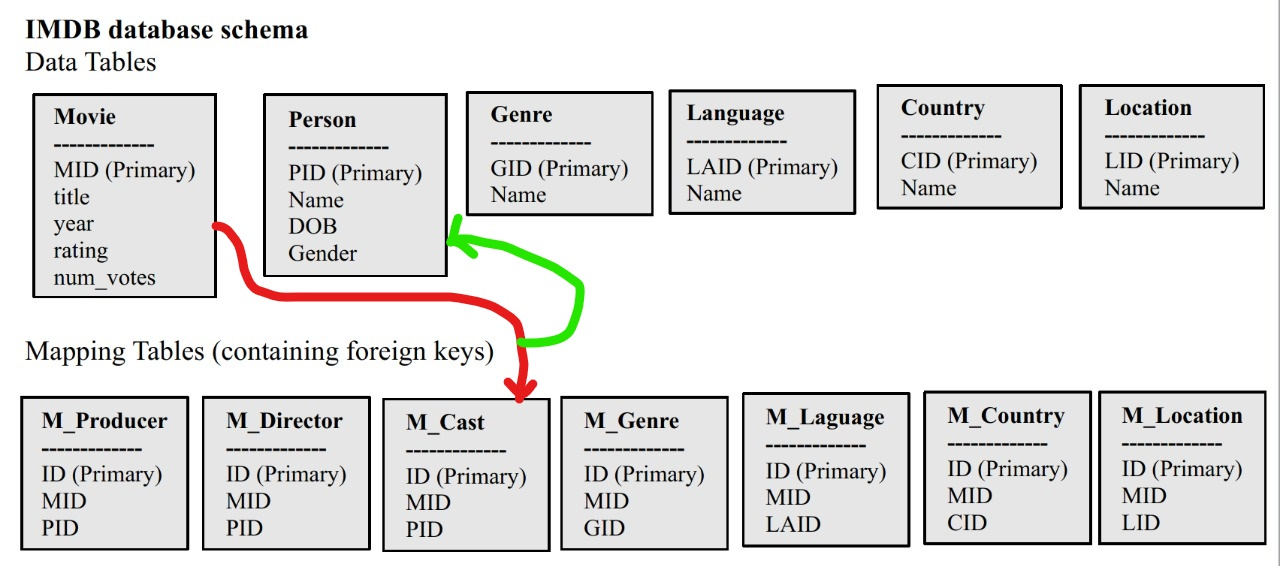

In [12]:
from IPython.display import Image
Image("img/ans_3.jpg",width=1200, height=300)

## Question 3 : List of all actors who acted in a film before 1970 and in a film after 1990.

### PART:-1 :: ACTORS_BEFORE_1970

In [4]:
part_1 = pd.read_sql_query(""" 

WITH actors_before_1970 AS
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) < 1970
    ),

actors_after_1990 AS 
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) > 1990
    )
SELECT * FROM actors_before_1970;

""", conn)

In [5]:
part_1

,PID,YEAR
0,nm0013934,1951
1,nm0045839,1951
2,nm0047008,1951
3,nm0051816,1951
4,nm0062592,1951
...,...,...
4057,nm0004334,1968
4058,nm0004660,1968
4059,nm0482285,1968
4060,nm0672784,1968


### PART:-2 :: ACTORS_AFTER_1990

In [6]:
part_2 = pd.read_sql_query(""" 

WITH actors_before_1970 AS
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) < 1970
    ),

actors_after_1990 AS 
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) > 1990
    )

SELECT * FROM actors_after_1990;

""", conn)

In [7]:
part_2

,PID,YEAR
0,nm0000288,2018
1,nm0000949,2018
2,nm0071007,2018
3,nm0114132,2018
4,nm0324009,2018
...,...,...
48703,nm2371614,2006
48704,nm2675737,2006
48705,nm2688404,2006
48706,nm1217389,1994


### PART:- 3 :: NOW WE HAVE TO MATCH  PERSON-ID FOR BOTH PARTS AND FIND THE PERSON NAME FROM PERSON TABLE  USING PID VALUE

In [8]:
part_3 = pd.read_sql_query(""" 

WITH actors_before_1970 AS
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) < 1970
    ),

actors_after_1990 AS 
    (
    SELECT DISTINCT TRIM(mc.PID) PID, m.year YEAR FROM M_CAST mc JOIN MOVIE m ON mc.MID=m.MID \
    WHERE CAST(SUBSTR(m.year,-4) AS UNSIGNED) > 1990
    )

SELECT  DISTINCT TRIM(p.name) PERSON FROM actors_before_1970 ac_1970 JOIN actors_after_1990 ac_1990 \
ON ac_1970.PID = ac_1990.PID \
JOIN PERSON p ON ac_1970.PID= TRIM(p.PID);

""", conn)

In [ ]:
part_3

#### TABLES USED :- MOVIE, M_CAST, AND PERSON
#### CAST(SUBSTR(m.year,-4) AS UNSIGNED) IS USED TO SELECT YEAR IF IT GIVEN AS 'I 2000'
